# A genetic algorithm for optimizing traveling salesman problem

https://github.com/luthfishahab/geneticalgorithm

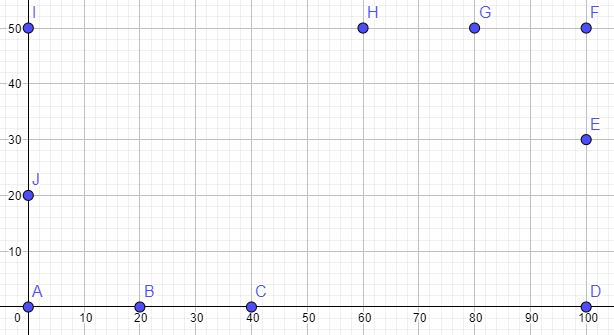

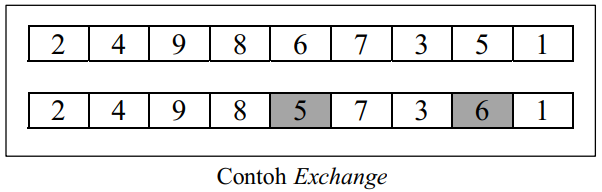

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# number of cities / points
m = 10

# number of chromosomes in population
n = 20

# maximum generation
N = 100

In [3]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20])

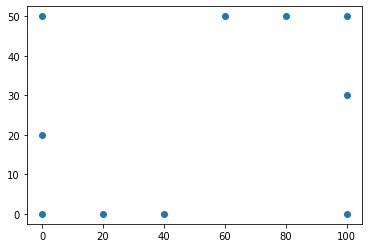

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104],
       [ 94,  78,  64,  53,  28,  20,   0,  20,  80,  85],
       [ 78,  64,  53,  64,  44,  40,  20,   0,  60,  67],
       [ 50,  53,  64, 111, 101, 100,  80,  60,   0,  30],
       [ 20,  28,  44, 101, 100, 104,  85,  67,  30,   0]])

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [8]:
# Belum dirubah
def randomSelection():
    position = np.random.permutation(n)
    
    return position[0], position[1]

In [9]:
# Belum dirubah
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popc.loc[i] = x
    
    return popc

In [10]:
def mutation(pop):
    popm = pop.copy()
    
    for i in range(n):
        position = np.random.permutation(m)
        a = position[0]
        b = position[1]
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [11]:
def combinePopulation(pop, popm):
    popAll = pop.copy()
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [12]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [14]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b)
    plt.show()

Populasi awal
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  0  1  4  3  8  9  7  6  5      501


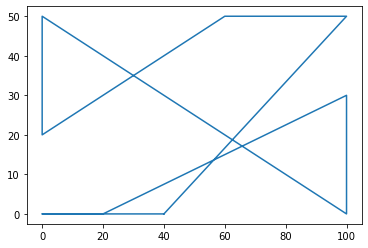


1
   0  1  2  3  4  5  6  7  8  9  fitness
0  1  9  8  6  7  3  2  4  5  0      500


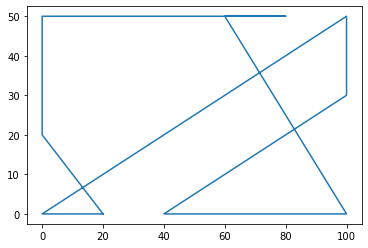


2
   0  1  2  3  4  5  6  7  8  9  fitness
0  1  9  8  6  7  3  2  4  5  0      500


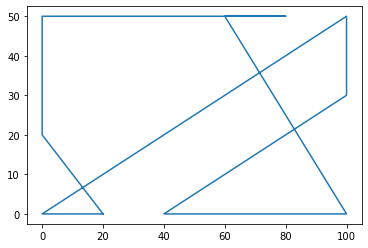


3
   0  1  2  3  4  5  6  7  8  9  fitness
0  1  9  8  6  7  3  2  4  5  0      500


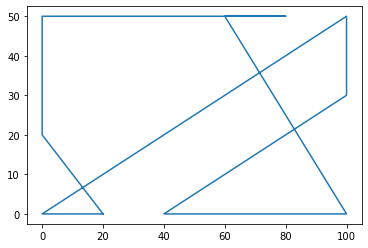


4
   0  1  2  3  4  5  6  7  8  9  fitness
0  1  8  9  5  4  3  2  7  6  0      484


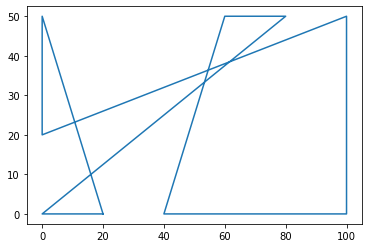


5
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  2  0  1  8  9  5  4  6  3      465


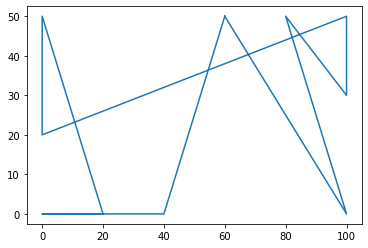


6
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  2  0  1  8  9  5  4  6  3      465


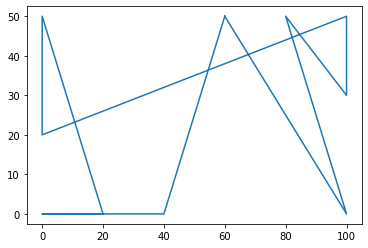


7
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  6  7  8  4  5  3  2  1  0      456


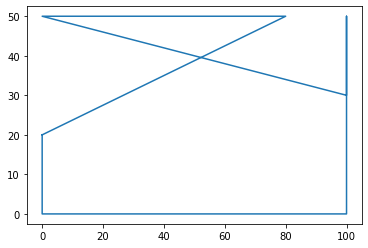


8
   0  1  2  3  4  5  6  7  8  9  fitness
0  1  8  9  5  4  3  6  7  2  0      423


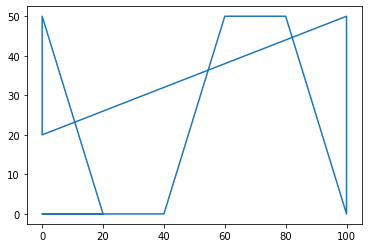


9
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  0  2  1  6  5  4  3  7  9      419


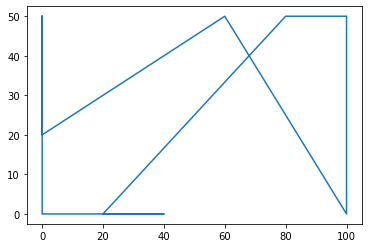


10
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  1  5  4  3  6  7  2  0      413


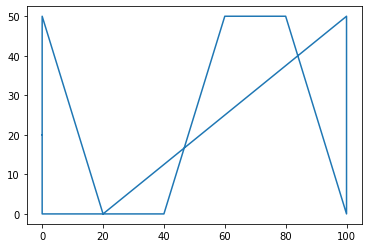


11
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  1  5  4  3  6  7  2  0      413


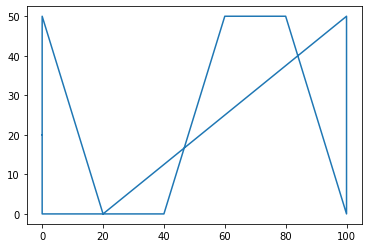


12
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


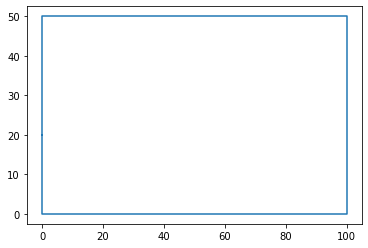


13
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


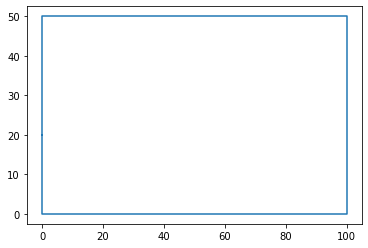


14
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


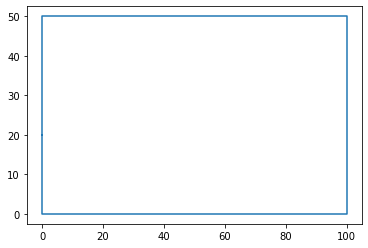


15
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


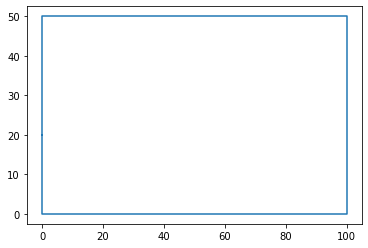


16
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


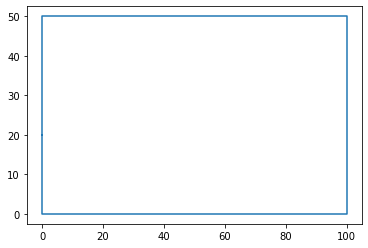


17
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


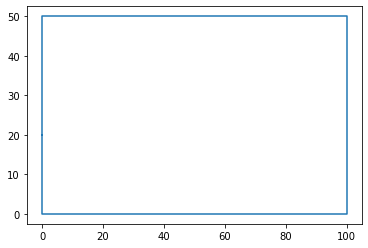


18
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


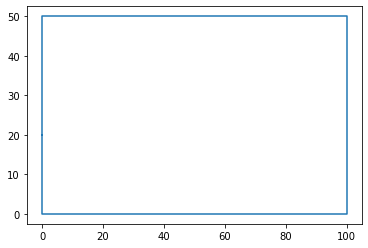


19
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


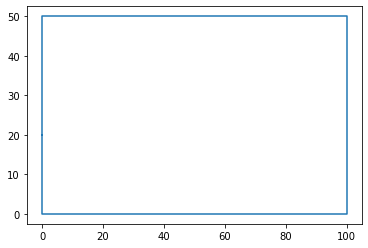


20
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


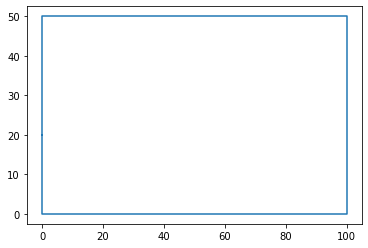


21
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


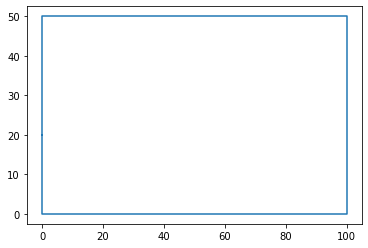


22
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


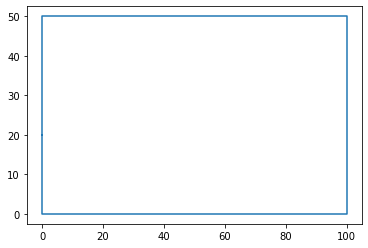


23
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


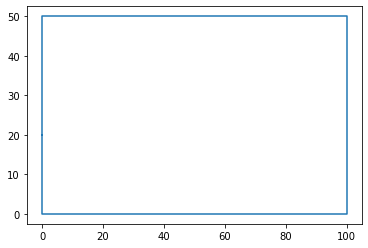


24
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


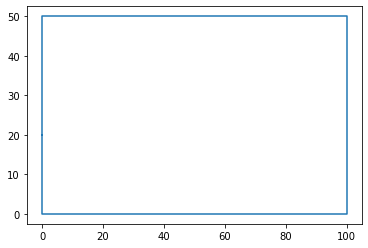


25
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


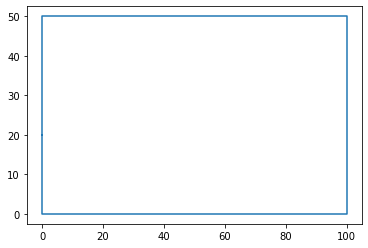


26
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


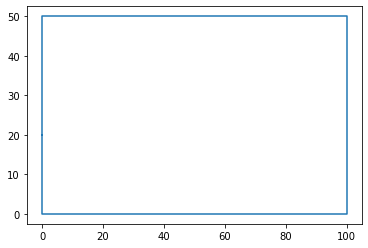


27
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


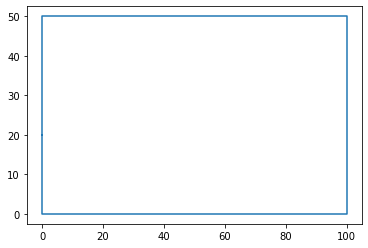


28
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


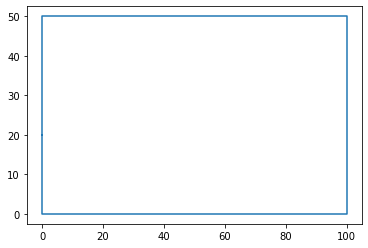


29
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


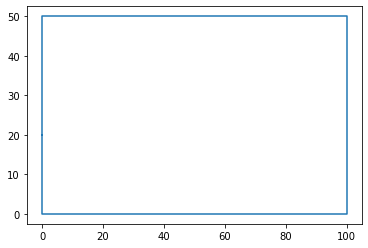


30
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


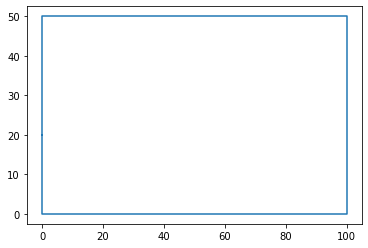


31
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


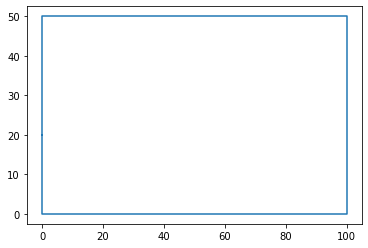


32
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


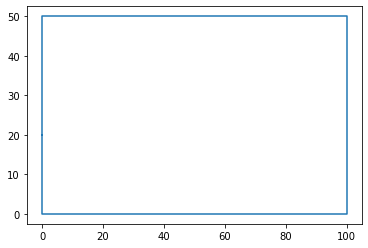


33
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


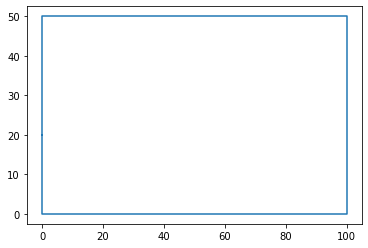


34
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


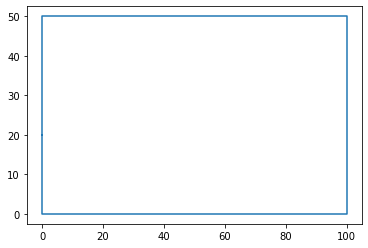


35
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


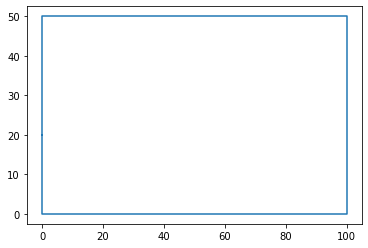


36
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


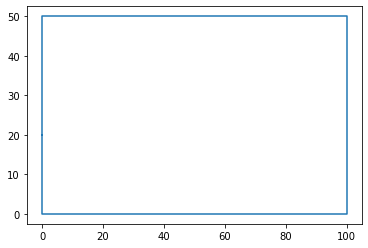


37
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


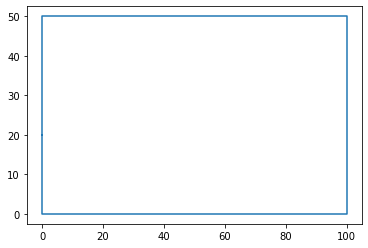


38
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


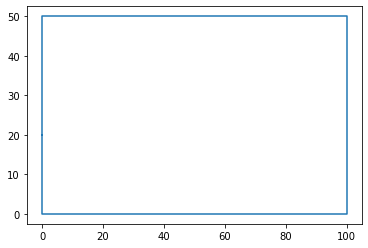


39
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


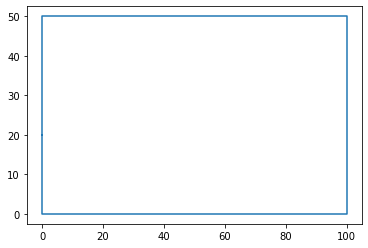


40
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


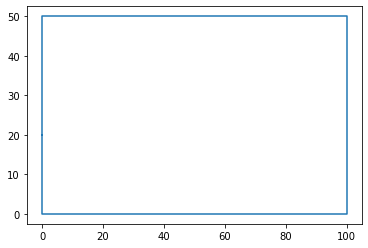


41
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


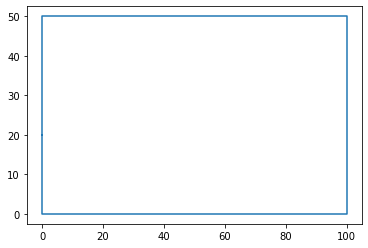


42
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


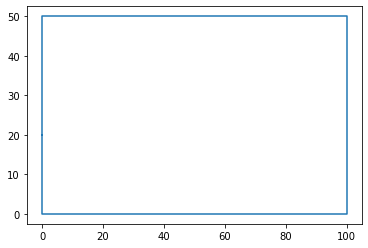


43
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


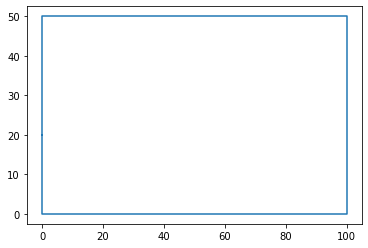


44
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


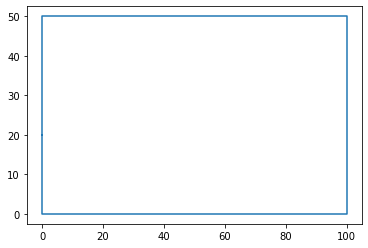


45
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


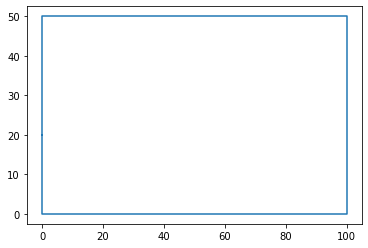


46
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


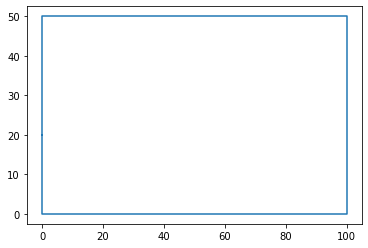


47
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


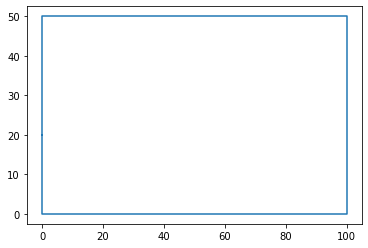


48
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


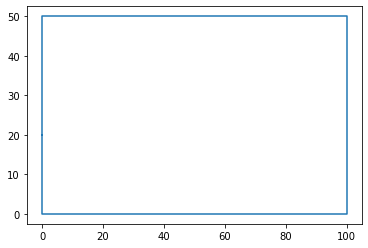


49
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


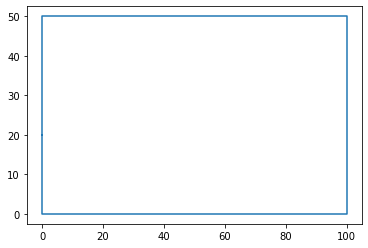


50
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


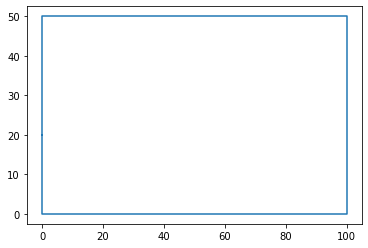


51
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


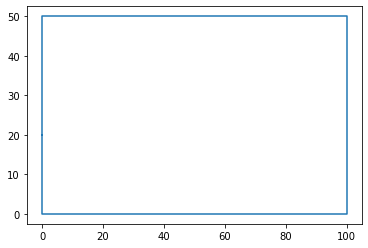


52
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


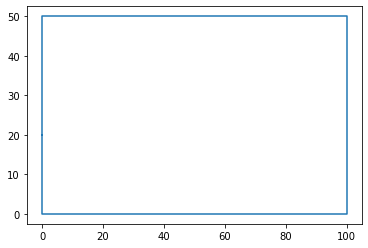


53
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


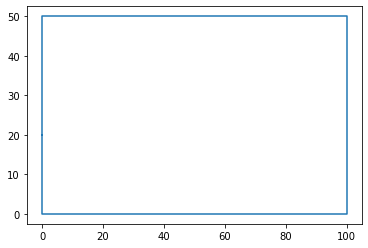


54
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


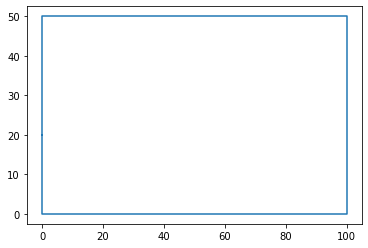


55
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


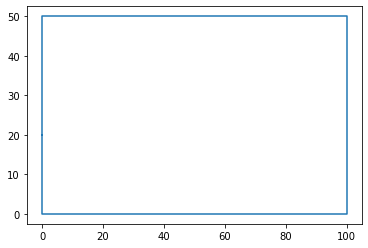


56
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


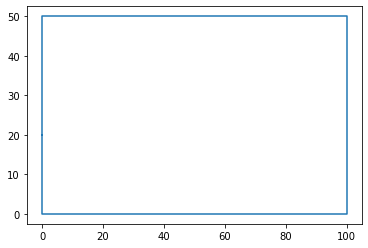


57
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


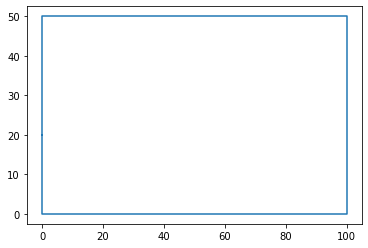


58
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


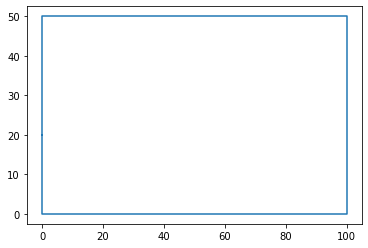


59
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


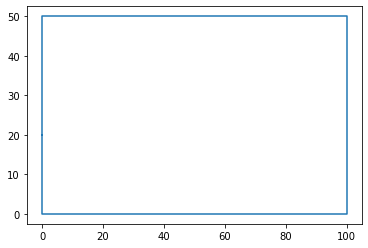


60
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


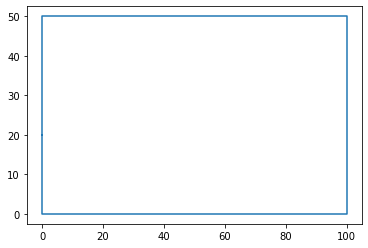


61
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


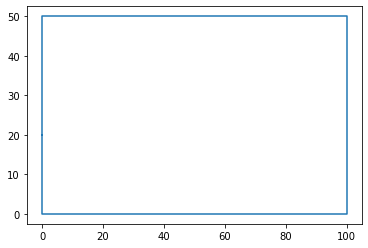


62
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


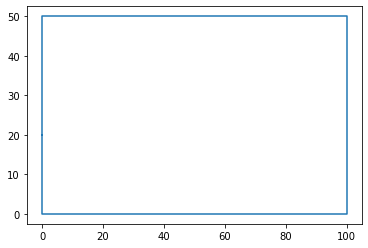


63
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


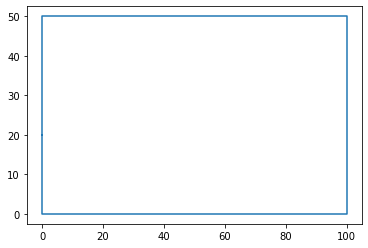


64
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


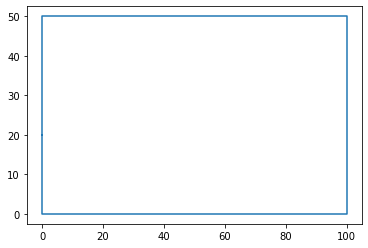


65
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


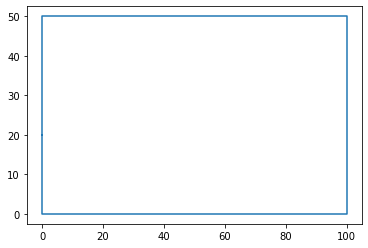


66
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


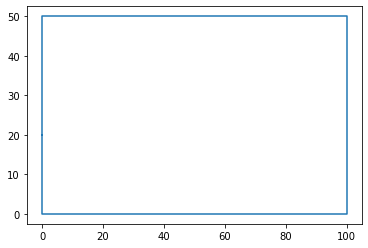


67
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


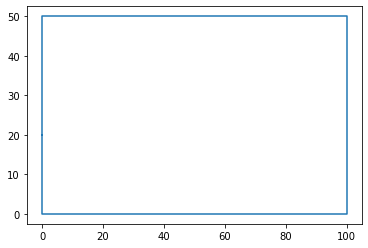


68
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


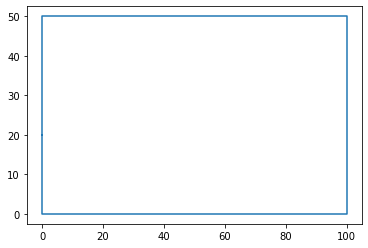


69
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


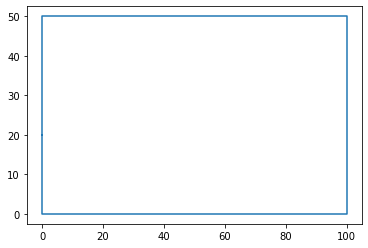


70
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


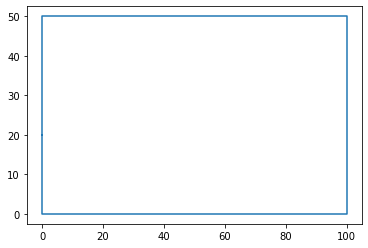


71
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


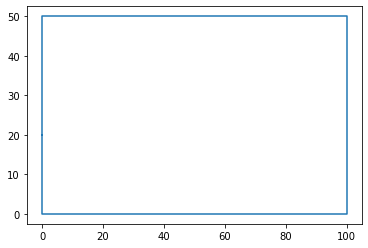


72
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


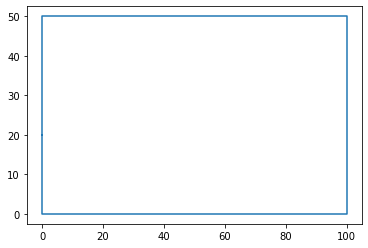


73
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


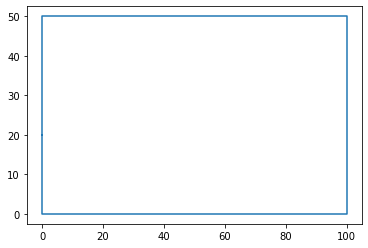


74
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


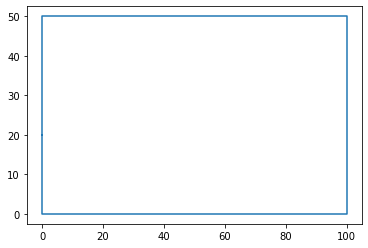


75
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


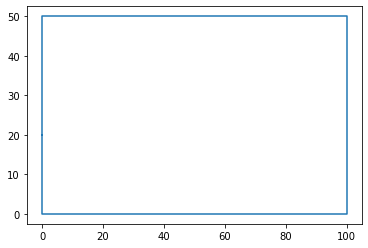


76
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


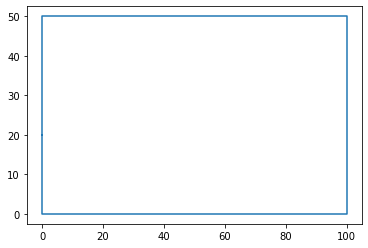


77
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


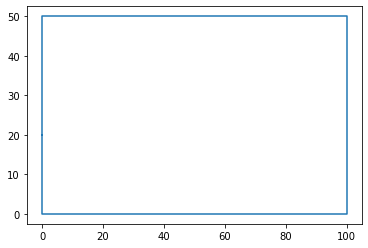


78
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


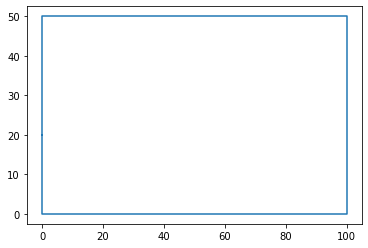


79
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


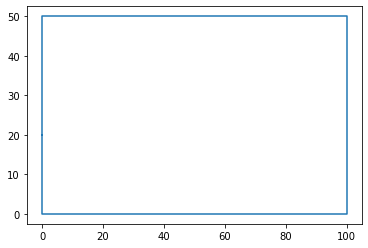


80
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


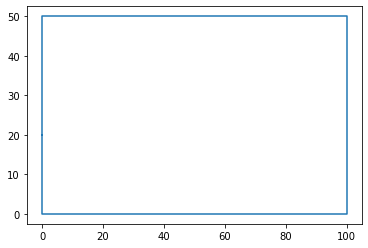


81
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


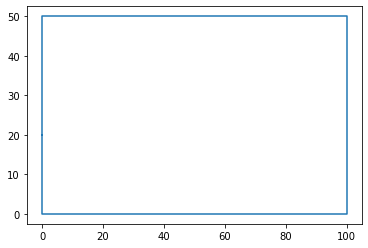


82
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


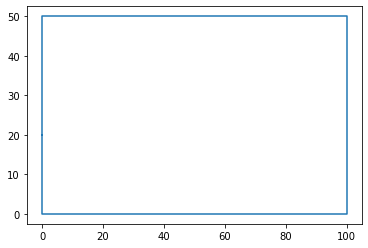


83
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


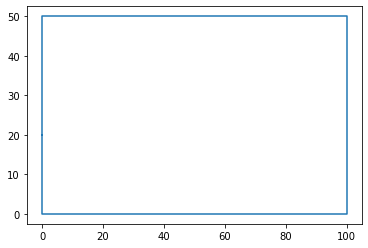


84
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


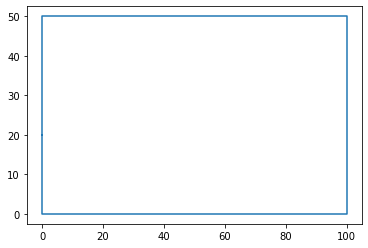


85
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


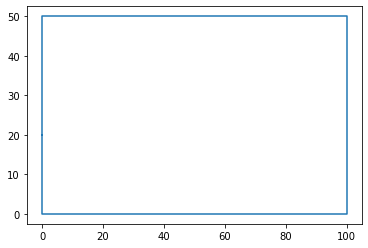


86
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


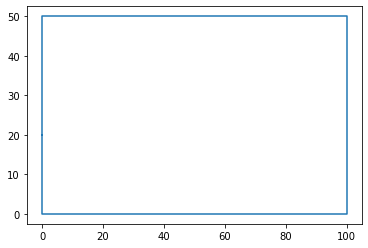


87
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


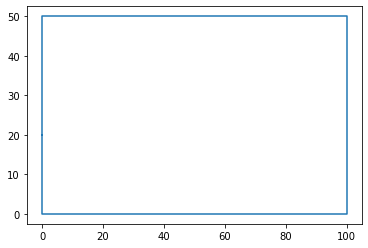


88
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


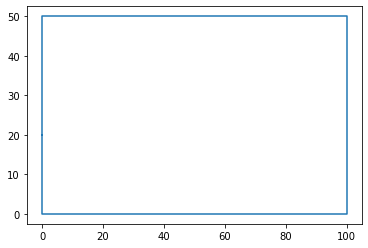


89
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


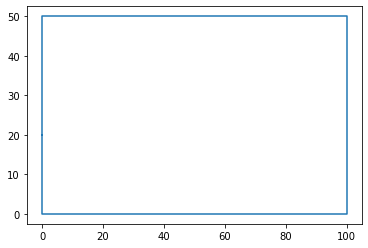


90
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


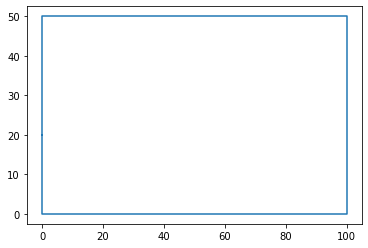


91
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


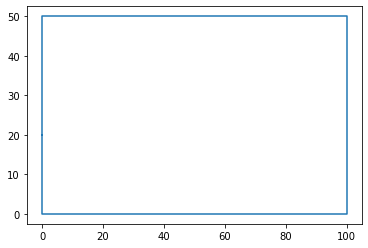


92
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


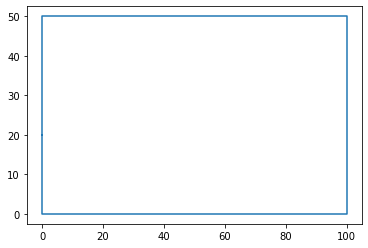


93
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


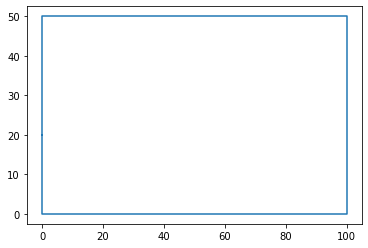


94
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


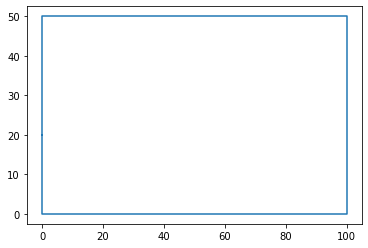


95
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


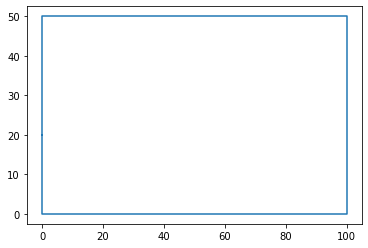


96
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


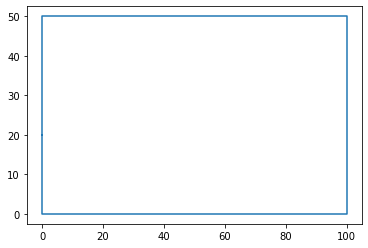


97
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


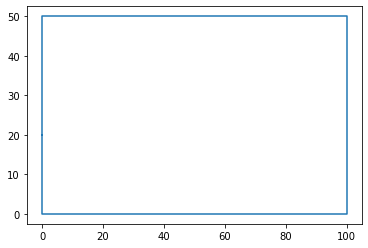


98
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


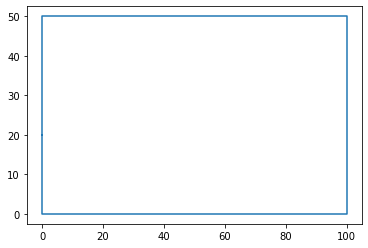


99
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


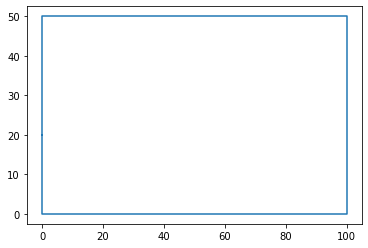


100
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


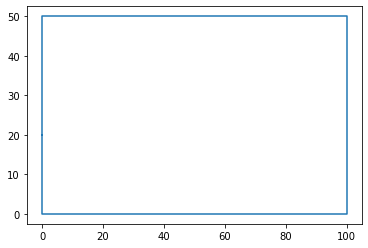


Populasi akhir
   0  1  2  3  4  5  6  7  8  9  fitness
0  9  8  7  6  5  4  3  2  1  0      300


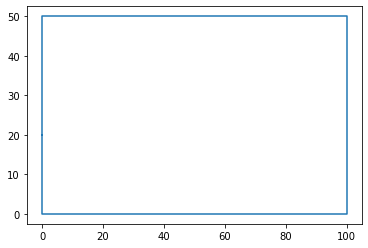

In [17]:
pop = createPopulation()
pop = fitness(pop)
print('Populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    #popc = crossover(pop)
    #popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    print()
    print(i)
    print(pop.head(1))
    plotSolution(pop)

print()
print('Populasi akhir')
print(pop.head(1))
plotSolution(pop)